In [27]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model as load_keras_model
from tensorflow.keras.layers import Flatten, Dense, InputLayer, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
import json

# Function to load configurations
def load_config(config_file):
    with open(config_file, 'r') as file:
        config = json.load(file)
    return config

# Load the configuration
config = load_config('config/config.json')

# Access the dataset path
dataset_dir = config['dataset_path']
train_dir = config['train_path']
val_dir = config['val_path']
test_dir = config['test_path']

In [3]:
# Image specifications
img_height = 64
img_width = 64
batch_size = 32

In [4]:
# Prepare ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 194 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [6]:
# Define the model architecture
model = Sequential([
    InputLayer(input_shape=(img_height, img_width, 3)),
    
    
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

/opt/anaconda3/envs/Thesis/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/opt/anaconda3/envs/Thesis/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 12,101,185 (46.16 MB)

 Trainable params: 12,097,217 (46.15 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [9]:
number_of_epochs = 30

In [10]:
# Train the model
history = model.fit(
    train_generator,
    epochs = number_of_epochs,
    validation_data=validation_generator
)

Epoch 1/30


/opt/anaconda3/envs/Thesis/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 865ms/step - accuracy: 0.5456 - loss: 0.8304 - val_accuracy: 0.5357 - val_loss: 0.7621
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 661ms/step - accuracy: 0.5461 - loss: 0.9178 - val_accuracy: 0.5000 - val_loss: 1.3777
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 639ms/step - accuracy: 0.5878 - loss: 0.7733 - val_accuracy: 0.5357 - val_loss: 0.8127
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 638ms/step - accuracy: 0.5009 - loss: 0.8974 - val_accuracy: 0.5714 - val_loss: 0.6832
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 642ms/step - accuracy: 0.5478 - loss: 0.8163 - val_accuracy: 0.6429 - val_loss: 0.6695
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 722ms/step - accuracy: 0.4633 - loss: 0.8563 - val_accuracy: 0.5357 - val_loss: 0.6757
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 644ms/step - accuracy: 0.5290 - loss: 0.8516 - val_accuracy: 0.5714 - val_loss: 0.6933
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 644ms/step - accuracy: 0.5323 - loss: 0.8148 - val_accuracy: 0.4643 - val_loss: 0.7131
Ep

In [11]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4286 - loss: 1.0340
Validation accuracy: 0.4285714328289032


In [20]:
file_name = f'Pth_Files/CNN_model_{number_of_epochs}.keras'

In [21]:
# Save the model, optional
model.save(file_name)

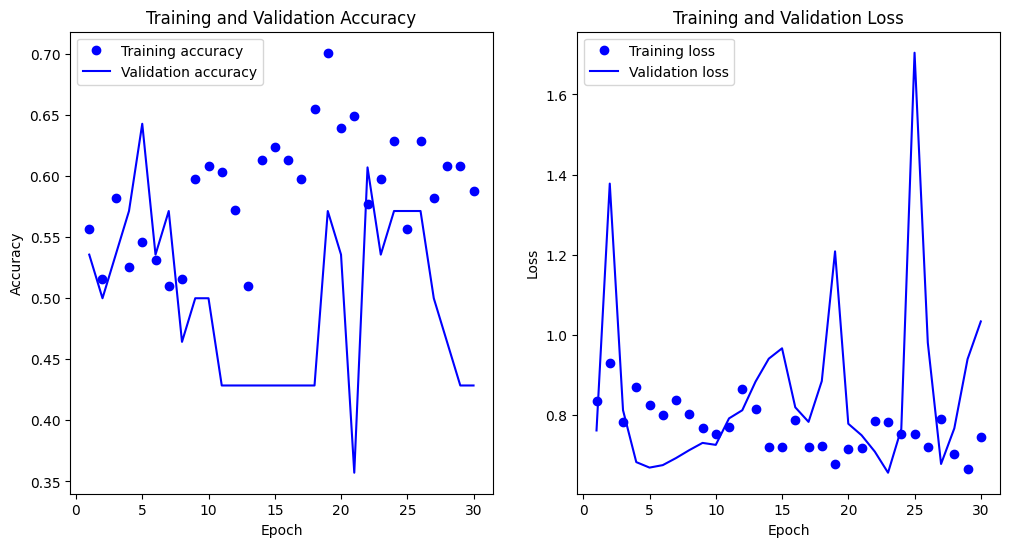

In [22]:
# Plot training & validation accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        linewidths=.5,
        square=True,
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix CNN Model', size=15)
    plt.show()

def load_model(file_path):
    extension = os.path.splitext(file_path)[1]
    if extension == '.pth':
        model = torch.load(file_path)
        model.eval()
        return model
    elif extension == '.keras':
        return load_keras_model(file_path)
    else:
        raise ValueError("Unsupported file extension: {}".format(extension))

def model_stats(model_file):
    model = load_model(model_file)
    predictions = []

    if isinstance(model, torch.nn.Module):
        model.eval()
        with torch.no_grad():
            for images, _ in validation_generator:
                images = images.to('cuda' if torch.cuda.is_available() else 'cpu')
                outputs = model(images)
                probabilities = torch.sigmoid(outputs)
                predictions.extend(probabilities.cpu().numpy().flatten())
    else:
        predictions = model.predict(validation_generator, steps=len(validation_generator)).ravel()

    y_pred = (predictions > 0.5).astype(int)
    y_true = validation_generator.classes

    # Classification report as a dictionary
    report = classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys(), output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    cm = confusion_matrix(y_true, y_pred)
    class_names = list(validation_generator.class_indices.keys())
    plot_confusion_matrix(cm, class_names)
    print(report_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/opt/anaconda3/envs/Thesis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/Thesis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/Thesis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


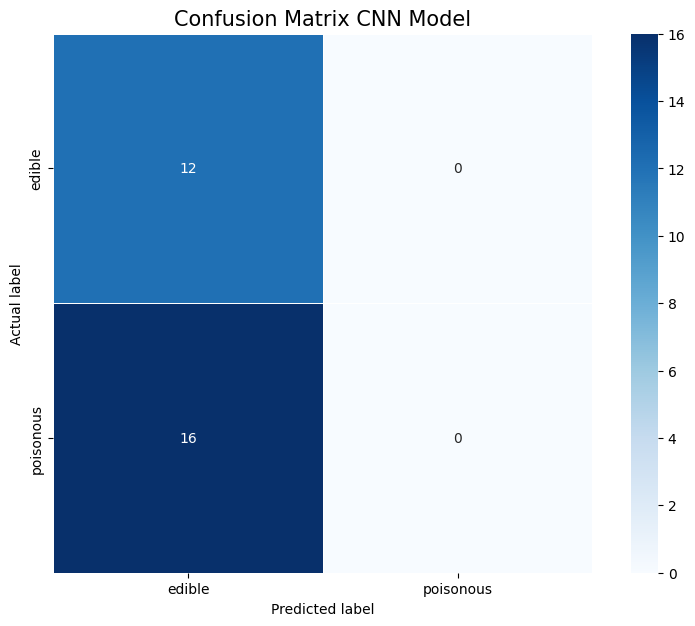

              precision    recall  f1-score    support
edible         0.428571  1.000000  0.600000  12.000000
poisonous      0.000000  0.000000  0.000000  16.000000
accuracy       0.428571  0.428571  0.428571   0.428571
macro avg      0.214286  0.500000  0.300000  28.000000
weighted avg   0.183673  0.428571  0.257143  28.000000


In [29]:
model_stats(file_name)